In [1]:
### General imports
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
from matplotlib.animation import FuncAnimation
from matplotlib import rc
import GPy
### --- Figure config
LEGEND_SIZE = 15

In [2]:
#Historical month and sunspot data (SILSO)
h_month = []
h_sunspot = []
with open('SN_ms_tot_V2.0.txt') as f:
    for line in f:
        arr = line.split()
        h_month.append(arr[0]+"-"+arr[1])
        h_sunspot.append(float(arr[3]))
# x = list(range(0,len(h_month)))

In [3]:
cycle = [[h_month.index("1755-02"),h_month.index("1761-06"),h_month.index("1766-06")],
 [h_month.index("1766-06"),h_month.index("1769-09"),h_month.index("1775-06")],
 [h_month.index("1775-06"),h_month.index("1778-05"),h_month.index("1784-09")],
 [h_month.index("1784-09"),h_month.index("1788-02"),h_month.index("1798-04")],
 [h_month.index("1798-04"),h_month.index("1805-02"),h_month.index("1810-08")],
 [h_month.index("1810-08"),h_month.index("1816-05"),h_month.index("1823-05")],
 [h_month.index("1823-05"),h_month.index("1829-11"),h_month.index("1833-11")],
 [h_month.index("1833-11"),h_month.index("1837-03"),h_month.index("1843-07")],
 [h_month.index("1843-07"),h_month.index("1848-02"),h_month.index("1855-12")],
 [h_month.index("1855-12"),h_month.index("1860-02"),h_month.index("1867-03")],
 [h_month.index("1867-03"),h_month.index("1870-08"),h_month.index("1878-12")],
 [h_month.index("1878-12"),h_month.index("1883-12"),h_month.index("1890-03")],
 [h_month.index("1890-03"),h_month.index("1894-01"),h_month.index("1902-01")],
 [h_month.index("1902-01"),h_month.index("1906-02"),h_month.index("1913-07")],
 [h_month.index("1913-07"),h_month.index("1917-08"),h_month.index("1923-08")],
 [h_month.index("1923-08"),h_month.index("1928-04"),h_month.index("1933-09")],
 [h_month.index("1933-09"),h_month.index("1937-04"),h_month.index("1944-02")],
 [h_month.index("1944-02"),h_month.index("1947-05"),h_month.index("1954-04")],
 [h_month.index("1954-04"),h_month.index("1958-03"),h_month.index("1964-10")],
 [h_month.index("1964-10"),h_month.index("1968-11"),h_month.index("1976-03")],
 [h_month.index("1976-03"),h_month.index("1979-12"),h_month.index("1986-09")],
 [h_month.index("1986-09"),h_month.index("1989-11"),h_month.index("1996-08")],
 [h_month.index("1996-08"),h_month.index("2001-11"),h_month.index("2008-12")],
 [h_month.index("2008-12"),h_month.index("2014-04"),h_month.index("2019-12")]]

In [4]:
sunspot = []
# x_train = [] //cannot use this
for c in cycle:
    sunspot.append(h_sunspot[c[0]])
#     x_train.append(c[0])
    sunspot+=h_sunspot[c[0]+1:c[1]][::5]
#     x_train+=x[c[0]+1:c[1]][::5]
    sunspot.append(h_sunspot[c[1]])
#     x_train.append(c[1])
    sunspot+=h_sunspot[c[1]+1:c[2]][::5]
#     x_train+=x[c[1]+1:c[2]][::5]

In [5]:
x = list(range(0,len(sunspot)))

In [6]:
len(x)

690

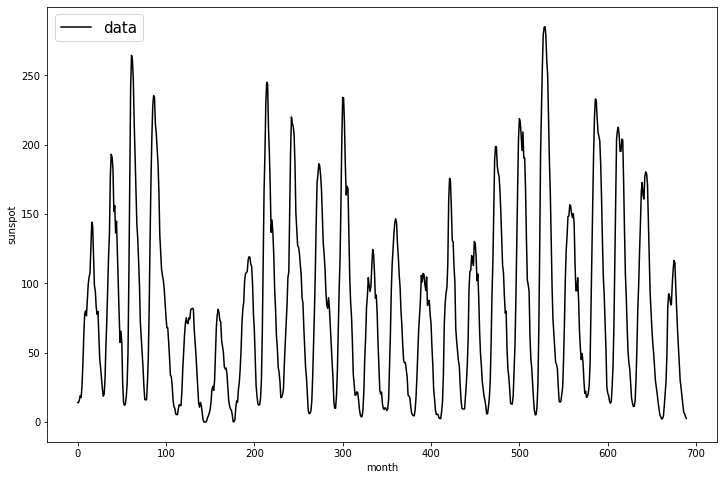

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(x, sunspot, "k", markersize=2, label="data")
plt.legend(loc=2, prop={'size': LEGEND_SIZE})
plt.xlabel("month")
plt.ylabel("sunspot")
plt.show()

In [11]:
train_month = np.reshape(x, (-1, 1))
train_sunspot = np.reshape(sunspot, (-1, 1))

 /usr/local/lib/python3.7/site-packages/GPy/kern/src/standard_periodic.py:153: RuntimeWarning:overflow encountered in true_divide
 /usr/local/lib/python3.7/site-packages/GPy/kern/src/standard_periodic.py:163: RuntimeWarning:invalid value encountered in multiply


{'dataplot': [<matplotlib.collections.PathCollection at 0x1211b2050>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x1211b2790>]],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x1211b2c50>]}

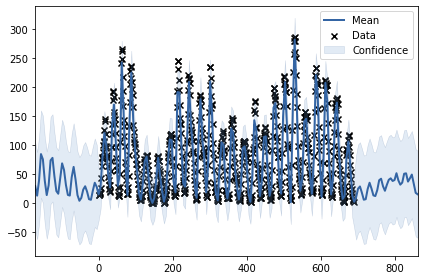

In [12]:
k_noise = GPy.kern.White(1)
k_rbf = GPy.kern.RBF(1)+ k_noise 
k_period = GPy.kern.StdPeriodic(1,period=9,lengthscale=1,variance=1)
k_mul = k_rbf*k_period
k_add = k_rbf+k_period+ k_noise 
# m1 = GPy.models.GPRegression(train_month, train_sunspot, k_rbf)
# m1.optimize()
# m2 = GPy.models.GPRegression(train_month, train_sunspot, k_period)
# m2.optimize()
# m3 = GPy.models.GPRegression(train_month, train_sunspot, k_mul)
# m3.optimize()
m4 = GPy.models.GPRegression(train_month, train_sunspot, k_add)
m4.optimize()
# m1.plot()
# m2.plot()
# m3.plot()
m4.plot()

In [13]:
sunspot_test = h_sunspot[h_month.index("2019-12"):h_month.index("2021-06")]

In [14]:
len(x)

690

In [26]:
x_predict = list(range(690,690+len(sunspot_test)))
test_month = np.reshape(x_predict, (-1, 1))

In [27]:
m4.predict(test_month)[0][:,0]

array([ 2.37405651,  2.56225179,  3.47493971,  5.06888149,  7.25423681,
        9.90042129, 12.8457815 , 15.91191546, 18.92178732, 21.71766728,
       24.17351127, 26.19809172, 27.72915454, 28.72290697, 29.14509863,
       28.96889179, 28.18120589, 26.79495785])

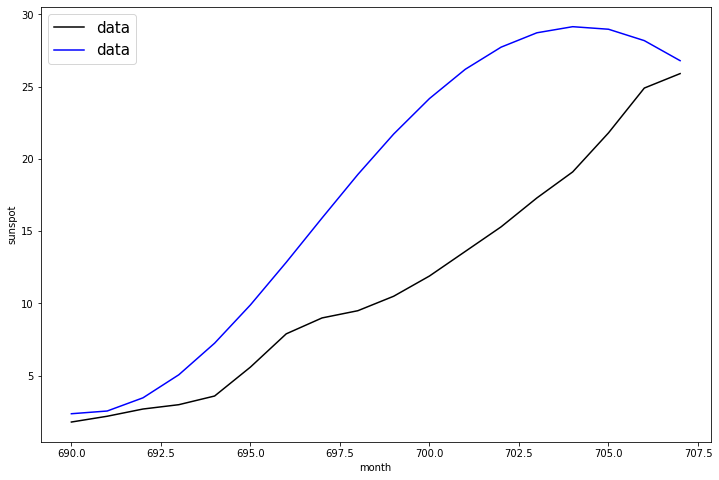

In [30]:
plt.figure(figsize=(12, 8))
plt.plot(x_predict, sunspot_test, "k", markersize=2, label="data")
plt.plot(x_predict, m4.predict(test_month)[0][:,0], "b", markersize=2, label="data")
plt.legend(loc=2, prop={'size': LEGEND_SIZE})
plt.xlabel("month")
plt.ylabel("sunspot")
plt.show()